## WORD2VEC (Pre Trained)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from gensim.models import KeyedVectors
import pickle

### Importing Dataset

In [2]:
data = pd.read_csv('C:/Users/Muzammil/Desktop/TA_Assignment_1/TA_Data_Collection/sentences.csv')
data.shape

(3328, 2)

In [3]:
data.tail()

,sentence,Text
3323,"India’s forex reserves increase, stand at $562...",MUMBAI: India’s foreign exchange reserves rose...
3324,"Ford to cut 1,100 jobs in Spain","MADRID: U.S. auto maker Ford plans to slash 1,..."
3325,Sri Lankan shares snap 6-day rally as financia...,"Sri Lankan shares closed lower on Friday, afte..."
3326,"NY cocoa to fall to $2,692",SINGAPORE: New York May cocoa is expected to b...
3327,Banks drag FTSE 100 to 1-month low,London’s blue-chip FTSE 100 index fell on Frid...


### Loading Pre Trained Word2Vec

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
model.vector_size

300

In [31]:
model['Hello']

array([-0.05102539,  0.12060547, -0.01257324,  0.03088379, -0.08544922,
        0.0534668 , -0.13964844, -0.16308594,  0.08300781,  0.20507812,
       -0.09423828,  0.15527344, -0.00418091,  0.02111816, -0.10986328,
        0.22460938,  0.22265625,  0.15917969,  0.05786133, -0.15527344,
        0.23046875,  0.34765625,  0.44335938, -0.14550781,  0.15136719,
        0.02209473, -0.16308594,  0.2578125 ,  0.20019531,  0.06054688,
       -0.0222168 , -0.13183594, -0.06396484, -0.12792969,  0.09814453,
       -0.13574219,  0.01928711,  0.25195312,  0.14257812,  0.2421875 ,
        0.03173828, -0.17089844,  0.26171875,  0.4296875 ,  0.24804688,
       -0.10351562, -0.13867188, -0.14257812, -0.20703125, -0.00860596,
       -0.43359375, -0.01757812,  0.40234375,  0.32617188,  0.33203125,
        0.01000977, -0.11523438, -0.12695312,  0.01940918, -0.25390625,
        0.00393677, -0.00344849, -0.19042969,  0.05419922,  0.14453125,
       -0.0546875 , -0.11132812,  0.15136719, -0.265625  ,  0.20

In [32]:
preprocessed_text = data.sentence.apply(gensim.utils.simple_preprocess)
preprocessed_text

0        [pemra, bans, airing, of, imran, khan, speeches]
1       [govt, immediately, lifts, pemra, ban, on, imr...
2       [pemra, imposes, ban, on, live, telecast, of, ...
3       [ihc, suspends, pemra, notification, banning, ...
4       [twitter, storm, after, pemra, bans, imran, li...
                              ...                        
3323    [india, forex, reserves, increase, stand, at, bn]
3324                     [ford, to, cut, jobs, in, spain]
3325    [sri, lankan, shares, snap, day, rally, as, fi...
3326                            [ny, cocoa, to, fall, to]
3327                  [banks, drag, ftse, to, month, low]
Name: sentence, Length: 3328, dtype: object

In [33]:
model.word_vec("bad")


C:\Users\Muzammil\AppData\Local\Temp\ipykernel_16012\2333033327.py:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  model.word_vec("bad")


array([ 0.06298828,  0.12451172,  0.11328125,  0.07324219,  0.03881836,
        0.07910156,  0.05078125,  0.171875  ,  0.09619141,  0.22070312,
       -0.04150391, -0.09277344, -0.02209473,  0.14746094, -0.21582031,
        0.15234375,  0.19238281, -0.05078125, -0.11181641, -0.3203125 ,
        0.00506592,  0.15332031, -0.02563477, -0.0234375 ,  0.36328125,
        0.20605469,  0.04760742, -0.02624512,  0.09033203,  0.00457764,
       -0.15332031,  0.06591797,  0.3515625 , -0.12451172,  0.03015137,
        0.16210938,  0.00242615, -0.02282715,  0.02978516,  0.00531006,
        0.25976562, -0.22460938,  0.29492188, -0.18066406,  0.07910156,
        0.02282715,  0.12109375, -0.17382812, -0.03735352, -0.06933594,
       -0.21972656,  0.1875    , -0.03320312, -0.06225586, -0.04492188,
        0.11621094, -0.23339844, -0.11669922,  0.09814453, -0.11962891,
        0.13964844,  0.28710938, -0.26953125, -0.05493164,  0.03112793,
       -0.05029297,  0.1328125 , -0.01831055, -0.37695312, -0.06

In [ ]:
model.most_similar('Dubai')

[('Abu_Dhabi', 0.7878970503807068),
 ('UAE', 0.7321926951408386),
 ('emirate', 0.715543270111084),
 ('Sharjah', 0.7086455225944519),
 ('United_Arab_Emirates', 0.6911906599998474),
 ('Ajman', 0.6768753528594971),
 ('Dubais', 0.6670787334442139),
 ('Fujairah', 0.6649850010871887),
 ('Nakheel', 0.6603208780288696),
 ('Ras_Al_Khaimah', 0.657249391078949)]

In [ ]:
model.most_similar(positive=['man', 'queen'], negative=['king'], topn=1)

[('woman', 0.7609435319900513)]

In [ ]:
model.most_similar(positive=['man', 'president'], negative=['minister'], topn=1)

[('woman', 0.451737642288208)]

In [ ]:
model.most_similar(positive=['wicket', 'baseball'], negative=['cricket'], topn=5)

[('inning', 0.5170379877090454),
 ('pitcher', 0.5008012652397156),
 ('pitchers', 0.4905071258544922),
 ('Bullpen_blows', 0.48777392506599426),
 ('Grapefruit_roundup', 0.4761795401573181)]

In [5]:
## function to create sentence embedding

def sentence_embedding(data):
    words = data.split()
    embedding = np.zeros(300)
    count = 0
    for word in words:
        if word in model.index_to_key:
            embedding += model[word]
            count += 1
    if count > 0:
        embedding /= count
    return embedding

In [6]:
corpus = []

for i in data['sentence']:
    corpus.append(sentence_embedding(i))

In [7]:
pickle.dump(corpus, open('W2V_Vector', 'wb'))

In [ ]:
np.array(corpus).shape

(3328, 300)

In [ ]:
print(np.array(corpus))

[[-0.17053833  0.07895508  0.17519531 ... -0.0265625  -0.06138916
   0.11728516]
 [-0.04949951  0.01161412  0.09089007 ... -0.05684989 -0.0823931
  -0.01377651]
 [-0.10493164 -0.04038086  0.12824097 ... -0.03017578  0.00581665
   0.08642578]
 ...
 [ 0.09457058  0.0389133   0.00555589 ...  0.04490577  0.02316623
   0.07532756]
 [-0.02368164  0.03678385 -0.13085938 ...  0.02132161 -0.02636719
  -0.06658936]
 [ 0.09874725 -0.00109863 -0.19677734 ...  0.12063599  0.08265305
  -0.04382324]]


In [ ]:
input_data = "tribut pour veteran actor muham qavi khan"

input_corpus  = sentence_embedding(input_data)

In [ ]:
input_corpus=input_corpus.reshape(1,300)

In [ ]:
np.array(input_corpus).shape

(1, 300)

### Cosine Similarity

In [ ]:
cos_similarities = cosine_similarity(np.array(input_corpus) , np.array(corpus))
print(cos_similarities)
print(cos_similarities.max())
print(cos_similarities[0].argmax())
print(cos_similarities[0].max())
s= cos_similarities[0].argsort()[-5:][::-1]
print(s)

[[0.31431361 0.22949886 0.24664227 ... 0.24705491 0.10965757 0.11103422]]
0.7163321812751485
909
0.7163321812751485
[ 909 1079  707  476  535]


In [ ]:
for i in s:
    print(data.sentence[i])

Tributes pour in for veteran actor Muhammed Qavi Khan
Tributes pour in for veteran actor Muhammed Qavi Khan
Veteran TV actor Qavi Khan passes away aged 80
Stars pay tribute to the ‘institution’ that was veteran actor Qavi Khan
Stars pay tribute to the ‘institution’ that was veteran actor Qavi Khan


## Clustering

### K Mean Clustering

In [ ]:
#use pca to reduce dimensionality
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(corpus)

Silhouette score: 0.4426882594296079


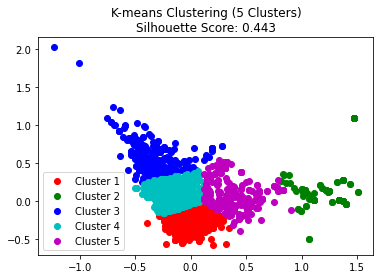

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[kmeans.labels_ == i, 0], reduced_matrix[kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f"K-means Clustering ({5} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

### Mini Batch K Mean Clustering

Silhouette score: 0.4387978584542887


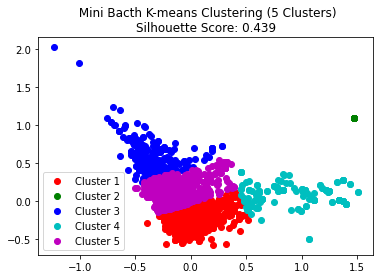

In [ ]:
mini_kmeans = MiniBatchKMeans(n_clusters=5)
mini_kmeans.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, mini_kmeans.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[mini_kmeans.labels_ == i, 0], reduced_matrix[mini_kmeans.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f" Mini Bacth K-means Clustering ({5} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()

### Agglomarative Clustering

Silhouette score: 0.4222316065932012


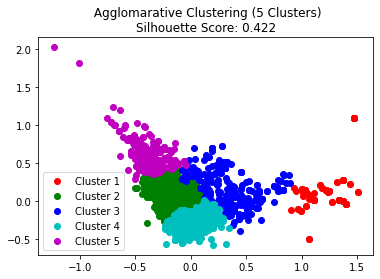

In [ ]:
aglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
aglo.fit(reduced_matrix)

# calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(reduced_matrix, aglo.labels_)
print(f"Silhouette score: {silhouette_avg}")

# plot the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    plt.scatter(reduced_matrix[aglo.labels_ == i, 0], reduced_matrix[aglo.labels_ == i, 1], c=colors[i], label=f"Cluster {i+1}")
plt.title(f" Agglomarative Clustering ({5} Clusters)\nSilhouette Score: {silhouette_avg:.3f}")
plt.legend()
plt.show()